<h1>Linear kernel Support Vector Machine</h1>

<h3>This notebook focuses on creating a linear kernel Support Vector Machine Model for classification</h3>

<p>Problem: predict if a person is going to buy a car based on their age and estimated salary</p>

<h3>Preprocessing as described in Part 1 of this course</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataFilePath = '../../data/Part 3 - Classification/Section 16 - Support Vector Machine (SVM)/Social_Network_Ads.csv'
dataset = pd.read_csv(dataFilePath)
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)

xStandardScaler = StandardScaler()
xTrain = xStandardScaler.fit_transform(xTrain)
xTest = xStandardScaler.transform(xTest)

dataset.head(10)

/home/danilofrp/.virtualenvs/udemy/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


<h3>Creating and Fitting a Logistic Regression Classifier to the Training Set</h3>

In [2]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(xTrain, yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

<h3>Predicting the Test set results</h3>

In [3]:
yPred = classifier.predict(xTest)

<h3>Building the Confusion Matrix</h3>

In [4]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = yTest, y_pred = yPred)
cm

array([[66,  2],
       [ 8, 24]])

<h3>Visualising the Training Set Results</h3>

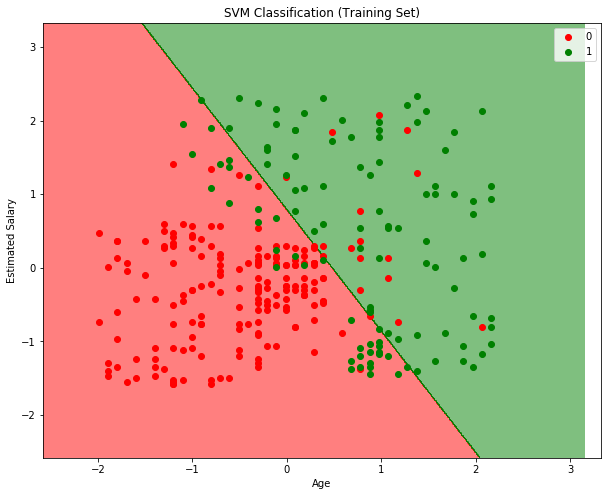

In [5]:
%matplotlib inline
from matplotlib.colors import ListedColormap

plt.rcParams['figure.figsize'] = (10,8)
xSet, ySet = xTrain, yTrain
x1, x2 = np.meshgrid(np.arange(start = xSet[:, 0].min() - 1, stop = xSet[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = xSet[:, 1].min() - 1, stop = xSet[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate(np.unique(ySet)):
    plt.scatter(xSet[ySet == j, 0], xSet[ySet == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

<h3>Visualising the Test Set Results</h3>

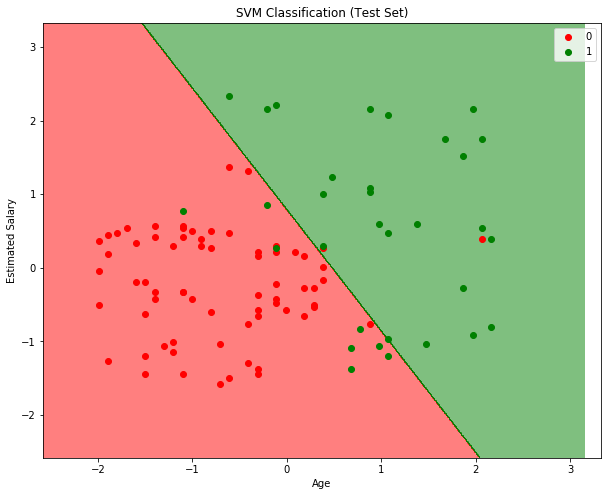

In [6]:
%matplotlib inline
from matplotlib.colors import ListedColormap

plt.rcParams['figure.figsize'] = (10,8)
xSet, ySet = xTest, yTest
x1, x2 = np.meshgrid(np.arange(start = xSet[:, 0].min() - 1, stop = xSet[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = xSet[:, 1].min() - 1, stop = xSet[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate(np.unique(ySet)):
    plt.scatter(xSet[ySet == j, 0], xSet[ySet == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()